In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [21]:
def veri_anahtarlarini_goster(dosya_yolu):
    veri = scipy.io.loadmat(dosya_yolu)
    print(veri.keys())

dosya_yolu = 'Salinas_corrected.mat'


veri_anahtarlarini_goster(dosya_yolu)

dict_keys(['__header__', '__version__', '__globals__', 'salinas_corrected'])


C:\Users\Asus\AppData\Local\Temp\ipykernel_2588\4208221510.py:10: RuntimeWarning: invalid value encountered in sqrt
  distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))


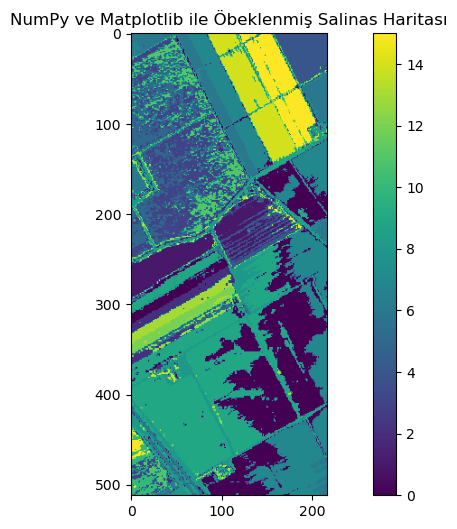

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def closest_centroid(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def compute_centroids(data, labels, k):
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, num_iters=100, tolerance=1e-5):
    centroids = initialize_centroids(data, k)
    for i in range(num_iters):
        old_centroids = centroids
        labels = closest_centroid(data, centroids)
        centroids = compute_centroids(data, labels, k)
        if np.all(np.abs(centroids - old_centroids) < tolerance):
            break
    return labels, centroids

# Veri setini yükleyin
mat = scipy.io.loadmat('Salinas.mat')
data = mat['salinas']

# Veri setini iki boyutlu hale getirin
data_reshaped = data.reshape((-1, data.shape[2]))

# K-Means algoritmasını uygulayın
kume_sayisi = 16
labels, centroids = kmeans(data_reshaped, kume_sayisi)

# Öbeklenmiş veriyi orijinal boyutlara dönüştürün
clustered_img = labels.reshape(data.shape[0], data.shape[1])

# Öbeklenmiş veriyi görselleştirin
plt.figure(figsize=(12, 6))
plt.imshow(clustered_img, cmap='viridis')
plt.colorbar()
plt.title('NumPy ve Matplotlib ile Öbeklenmiş Salinas Haritası')
plt.show()


224 boyutundan 4 boyutuna indirgendi ve %95 varyans korundu.


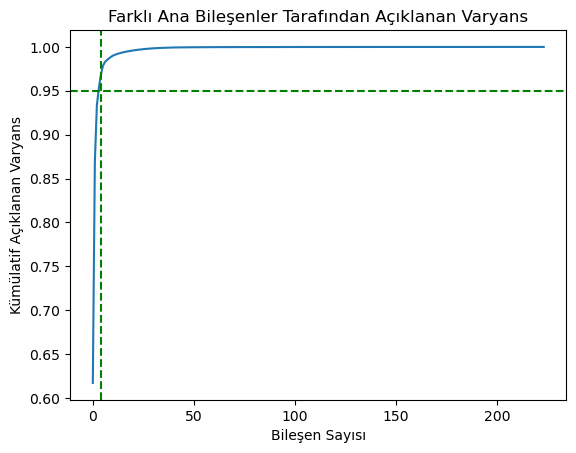

In [6]:
veri = loadmat('Salinas.mat')['salinas']

# Veriler 2D diziye yeniden şekillendirildi; her satır bir pikseli ve her sütun bir spektral bandı temsil ediyor
piksel_sayısı = veri.shape[0] * veri.shape[1]
band_sayısı = veri.shape[2]
veri_yeniden_şekillendirildi = veri.reshape((piksel_sayısı, band_sayısı))

# Veriler standartlaştırıldı
veri_ortalama = np.mean(veri_yeniden_şekillendirildi, axis=0)
veri_std = np.std(veri_yeniden_şekillendirildi, axis=0)
veri_standartlaştırıldı = (veri_yeniden_şekillendirildi - veri_ortalama) / veri_std

# Kovaryans matrisi hesaplandı
kovaryans_matrisi = np.cov(veri_standartlaştırıldı, rowvar=False)

# Kovaryans matrisinin özdeğerleri ve özvektörleri hesaplandı
özdeğerler, özvektörler = np.linalg.eig(kovaryans_matrisi)

# Özdeğerler ve karşılık gelen özvektörler azalan sırada sıralandı
sıralı_indisler = np.argsort(özdeğerler)[::-1]
sıralı_özdeğerler = özdeğerler[sıralı_indisler]
sıralı_özvektörler = özvektörler[:, sıralı_indisler]

# Her bileşenin açıkladığı kümülatif varyans hesaplandı
kümülatif_varyans = np.cumsum(sıralı_özdeğerler) / np.sum(sıralı_özdeğerler)

# Belirli bir yüzde varyansı açıklayacak bileşen sayısı belirlendi
varyans_eşiği = 0.95
bileşen_sayısı = np.argmax(kümülatif_varyans >= varyans_eşiği) + 1

# Eşiğe göre en üstteki ana bileşenler seçildi
en_üst_özvektörler = sıralı_özvektörler[:, :bileşen_sayısı]

# Veriler yeni bir alt uzaya dönüştürüldü
dönüştürülen_veri = np.dot(veri_standartlaştırıldı, en_üst_özvektörler)

# Boyut azaltmanın ne kadar yapıldığı ve neden yapıldığı yazdırıldı
print(f"{band_sayısı} boyutundan {bileşen_sayısı} boyutuna indirgendi ve %95 varyans korundu.")

# Opsiyonel: Kumulatif açıklanan varyans çizildi
plt.figure()
plt.plot(kümülatif_varyans)
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Kümülatif Açıklanan Varyans')
plt.title('Farklı Ana Bileşenler Tarafından Açıklanan Varyans')
plt.axhline(y=varyans_eşiği, color='g', linestyle='--')  # Yeşil çizgi
plt.axvline(x=bileşen_sayısı, color='g', linestyle='--')       # Yeşil çizgi
plt.show()


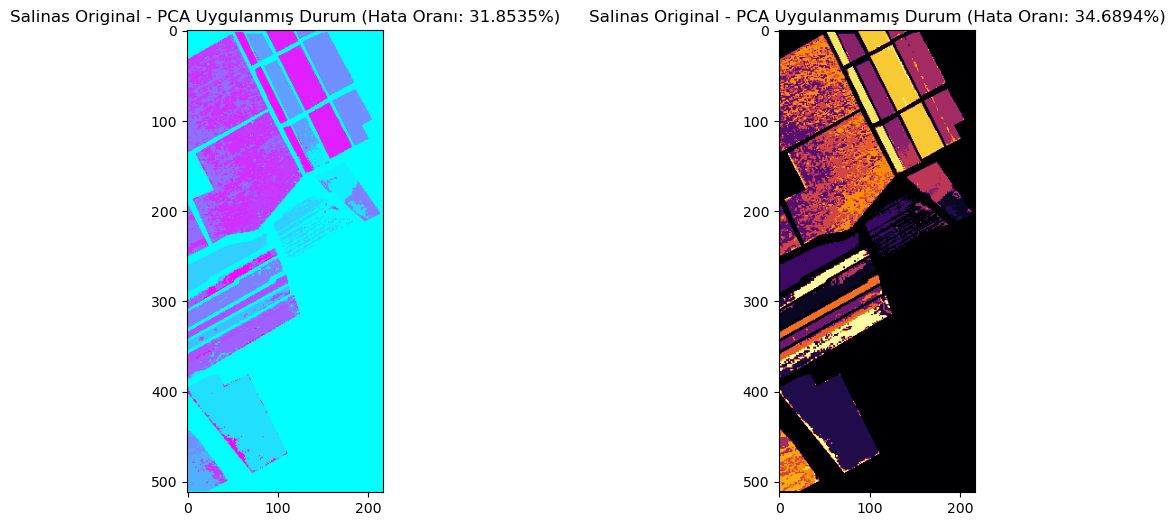

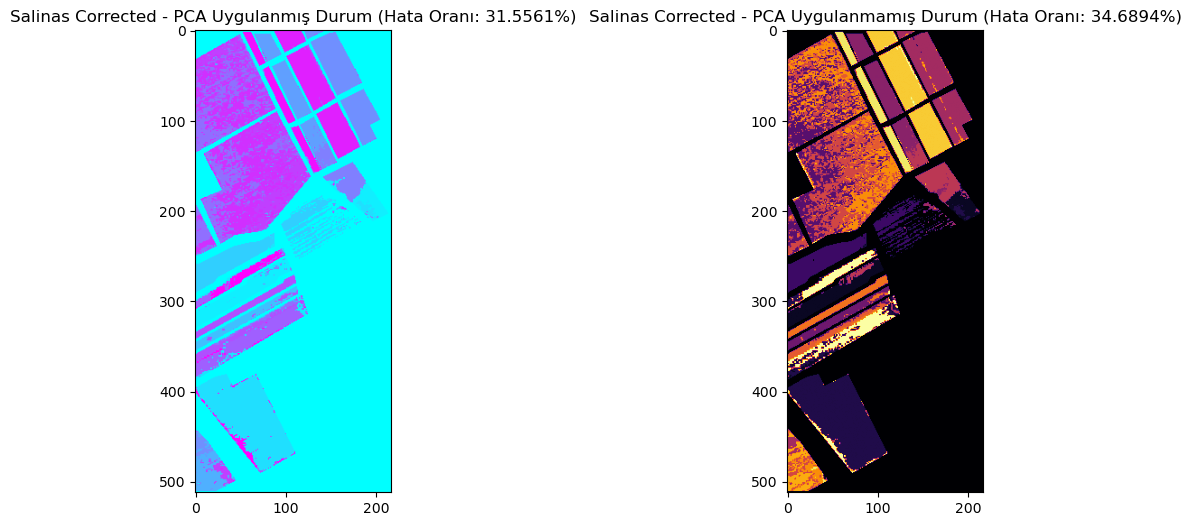

Salinas Original - PCA Uygulanmış Durum: 31.8535%
Salinas Original - PCA Uygulanmamış Durum: 34.6894%
Salinas Corrected - PCA Uygulanmış Durum: 31.5561%
Salinas Corrected - PCA Uygulanmamış Durum: 34.6894%


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.optimize import linear_sum_assignment

# K-means kümeleme algoritması
def kmeans(X, n_clusters, max_iter=100):
    np.random.seed(42)  # Rastgelelik için seed değeri
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]  # Başlangıçta rastgele merkezler seç

    for _ in range(max_iter):
        # Her noktanın merkezlere uzaklığını hesapla
        distances = np.linalg.norm(X - centroids[:, np.newaxis], axis=2)
        # Her noktanın en yakın olduğu merkezi bul
        closest_cluster = np.argmin(distances, axis=0)
        # Merkezleri güncelle
        new_centroids = np.array([X[closest_cluster == k].mean(axis=0) if np.any(closest_cluster == k) else centroids[k] for k in range(n_clusters)])

        # Eğer merkezler değişmediyse döngüyü bitir
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return closest_cluster, centroids

# PCA (Ana Bileşen Analizi) işlevi
def perform_pca(data, variance_threshold=0.95):
    # Verinin standartlaştırılması
    data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    # Kovaryans matrisinin hesaplanması
    cov_matrix = np.cov(data_standardized, rowvar=False)
    # Özdeğerlerin ve özvektörlerin hesaplanması
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    # Özdeğerlerin büyükten küçüğe sıralanması
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    # Kumulatif varyansın hesaplanması
    cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
    # Belirlenen varyans eşiğine göre bileşen sayısının seçilmesi
    num_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    top_eigenvectors = sorted_eigenvectors[:, :num_components]
    # Verinin yeni boyuta indirgenmesi
    transformed_data = np.dot(data_standardized, top_eigenvectors)
    return transformed_data, num_components

# Ayarlanmış hata oranının hesaplanması
def calculate_adjusted_error(clusters, ground_truth, n_clusters):
    confusion_matrix = np.zeros((n_clusters, n_clusters), dtype=int)
    # Karmaşıklık matrisinin oluşturulması
    for i in range(n_clusters):
        for j in range(n_clusters):
            confusion_matrix[i, j] = np.sum((clusters == i) & (ground_truth == j))
    # En düşük hata oranını elde etmek için satır ve sütunların eşleştirilmesi
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)
    # Ayarlanmış kümeleme sonuçlarının hesaplanması
    adjusted_clusters = np.zeros_like(clusters)
    for i, j in zip(row_ind, col_ind):
        adjusted_clusters[clusters == i] = j
    # Hata oranının dönülmesi
    return np.mean(adjusted_clusters != ground_truth) * 100


salinas_path = 'Salinas.mat'
corrected_path = 'Salinas_corrected.mat'
gt_path = 'Salinas_gt.mat'

salinas = scipy.io.loadmat(salinas_path)['salinas']
salinas_corrected = scipy.io.loadmat(corrected_path)['salinas_corrected']
salinas_gt = scipy.io.loadmat(gt_path)['salinas_gt']


ground_truth = salinas_gt.flatten()

# Veri işleme ve görselleştirme fonksiyonu
def process_and_visualize(data, ground_truth, dataset_name):
    rows, cols, bands = data.shape
    # Veriyi düzleştirme
    data_reshaped = data.reshape((rows * cols, bands))
    # Arka plan olmayan piksellerin seçilmesi
    mask = ground_truth > 0
    data_reshaped = data_reshaped[mask]
    ground_truth = ground_truth[mask]
    # PCA ve k-means kümelemesinin uygulanması
    pca_data, num_components = perform_pca(data_reshaped)
    clusters_pca, centroids_pca = kmeans(pca_data, n_clusters)
    # Sadece k-means kümelemesinin uygulanması
    clusters, centroids = kmeans(data_reshaped, n_clusters)
    # Ayarlanmış hata oranlarının hesaplanması
    error_pca = calculate_adjusted_error(clusters_pca, ground_truth, n_clusters)
    error = calculate_adjusted_error(clusters, ground_truth, n_clusters)
    # Sonuçların görselleştirilmesi
    clusters_pca_full = np.zeros((rows * cols))  # Arka plan için sıfırlarla doldurulma
    clusters_pca_full[mask] = clusters_pca  # Arka plan olmayan tahminlerin doldurulması
    clusters_full = np.zeros((rows * cols))
    clusters_full[mask] = clusters
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    axs[0].imshow(clusters_pca_full.reshape(rows, cols), cmap='cool')
    axs[0].set_title(f'{dataset_name} - PCA Uygulanmış Durum (Hata Oranı: {error_pca:.4f}%)')
    axs[1].imshow(clusters_full.reshape(rows, cols), cmap='inferno')
    axs[1].set_title(f'{dataset_name} - PCA Uygulanmamış Durum (Hata Oranı: {error:.4f}%)')
    plt.show()
    return error_pca, error

# Salinas veri seti için PCA uygulama, k-means yapın ve görselleştirme
n_clusters = np.unique(ground_truth).size  
error_pca_salinas, error_salinas = process_and_visualize(salinas, ground_truth, 'Salinas Original')

# Salinas Corrected veri seti için PCA uygulama, k-means yapın ve görselleştirme
error_pca_corrected, error_corrected = process_and_visualize(salinas_corrected, ground_truth, 'Salinas Corrected')

print(f'Salinas Original - PCA Uygulanmış Durum: {error_pca_salinas:.4f}%')
print(f'Salinas Original - PCA Uygulanmamış Durum: {error_salinas:.4f}%')
print(f'Salinas Corrected - PCA Uygulanmış Durum: {error_pca_corrected:.4f}%')
print(f'Salinas Corrected - PCA Uygulanmamış Durum: {error_corrected:.4f}%')